In [1]:
import os
import scipy.io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from PIL import Image 
from data import load_new_data, data_convert
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,concatenate,Cropping2D
from keras.models import Model
import time

from tensorflow import set_random_seed


Using TensorFlow backend.
C:\Users\Jenna\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jenna\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jenna\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jenna\anaconda3\envs\MNIST\lib\site-pa

In [2]:

pixel=28
    
if os.path.isdir('model'):
    print("model dir exist")
else:
    print("create model dir")  
    os.mkdir('model')
    
if os.path.isfile('data.mat'):
    print ('data.mat already exist')
    #data_convert (new_astype='uint8', new_size=pixel)
else:
    #data_convert (new_astype='uint8', new_size=pixel)
    data_convert (new_size=pixel)



model dir exist
data.mat already exist



-----------------check_mat------------------
data keys : dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_label', 'test_data', 'test_label'])
train_data shape : (55000, 28, 28)
img pixel type : <class 'numpy.float32'>
check_mat train label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


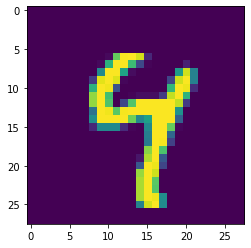

train_data.shape: (55000, 28, 28)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28)
test_label.shape: (10000, 10)
------------------------------------
train_data.shape: (55000, 28, 28, 1)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28, 1)
test_label.shape: (10000, 10)


In [3]:

train_data,train_label,test_data,test_label=load_new_data(True) # load data from 'data.mat

print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)

train_data=train_data.reshape(train_data.shape[0],pixel,pixel,1) # 三維 to 四維
test_data=test_data.reshape(test_data.shape[0],pixel,pixel,1)

print ("------------------------------------")
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)








    

In [4]:

# In[2]:   Hyperparameter

BATCH_SIZE = 44000 #44000 #change there
NUM_EPOCHS = 250
TRAIN_DATA = 0.05
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)

'''
BATCH_SIZE = 256 #change there
NUM_EPOCHS = 35
TRAIN_DATA = 1 
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
'''

train_data.shape: (2750, 28, 28, 1)
train_label.shape: (2750, 10)


'\nBATCH_SIZE = 256 #change there\nNUM_EPOCHS = 35\nTRAIN_DATA = 1 \nVAL = 0.2\n\nTRAIN_DATA=int (1/TRAIN_DATA)\ntrain_data = train_data [::TRAIN_DATA]\ntrain_label = train_label [::TRAIN_DATA]\nprint ("train_data.shape:",train_data.shape)\nprint ("train_label.shape:",train_label.shape)\n'

In [5]:

# In[3]:
def model_NN(input_shape):
    X_input = Input(input_shape)
    W1 = Flatten()(X_input)
#--------------------------------D1--------------------------------------------    
    D1 = Dense(256, activation='relu', name='fc1')(W1) # Hidden layer 
    # activation can be relu 
    W1 = Dropout(0.5)(W1) 
    #D1 = Dense(64, activation='relu', name='fc2')(D1) # Hidden layer 
#--------------------------------O1--------------------------------------------    
    O1 = Dense(10, activation='softmax', name='out')(D1)    
    
    model_NN = Model(inputs = X_input, outputs = O1 ,name='NN') # spec. input output name
    return model_NN


In [6]:

# In[4]:  training setup
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) # Record time info.
from keras.callbacks import ModelCheckpoint
if VAL !=0:
    # Training Tips: save best weights during training
    checkpoint = ModelCheckpoint("model/Best_NN_weights_{epoch:02d}_{val_loss:.2f}.h5", 
                                 monitor='val_loss', verbose=0,save_best_only=True, mode='auto', period=1)
    
NN=model_NN((pixel,pixel,1))

NN.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print(NN.summary()) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# In[4]:  training

if VAL !=0:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
else:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1)
''' 
NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])    
'''    
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 

Instructions for updating:
Use tf.cast instead.
Train on 2200 samples, validate on 550 samples
Epoch 1/250
2200/2200 [==============================] - 0s 124us/step - loss: 2.4119 - acc: 0.0436 - val_loss: 1.8541 - val_acc: 0.5055
Epoch 2/250
2200/2200 [==============================] - 0s 25us/step - loss: 1.8339 - acc: 0.5300 - val_loss: 1.5080 - val_acc: 0.6836
Epoch 3/250
2200/2200 [==============================] - 0s 32us/step - loss: 1.4732 - acc: 0.6955 - val_loss: 1.2697 - val_acc: 0.7473
Epoch 4/250
2200/2200 [==============================] - 0s 36us/step - loss: 1.2367 - acc: 0.7541 - val_loss: 1.1455 - val_acc: 0.7182
Epoch 5/250
2200/2200 [==============================] - 0s 31us/step - loss: 1.0984 - acc: 0.7227 - val_loss: 1.0867 - val_acc: 0.7273
Epoch 6/250
2200/2200 [==============================] - 0s 29us/step - loss: 1.0433 - acc: 0.7468 - val_loss: 0.9668 - val_acc: 0.7455
Epoch 7/250
2200/2200 [==============================] - 0s 31us/step - loss: 0.9270 - a

Epoch 59/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.2158 - acc: 0.9468 - val_loss: 0.3711 - val_acc: 0.8855
Epoch 60/250
2200/2200 [==============================] - 0s 25us/step - loss: 0.2158 - acc: 0.9486 - val_loss: 0.4014 - val_acc: 0.8855
Epoch 61/250
2200/2200 [==============================] - 0s 32us/step - loss: 0.2180 - acc: 0.9436 - val_loss: 0.3689 - val_acc: 0.8873
Epoch 62/250
2200/2200 [==============================] - 0s 32us/step - loss: 0.2110 - acc: 0.9500 - val_loss: 0.3872 - val_acc: 0.8836
Epoch 63/250
2200/2200 [==============================] - 0s 29us/step - loss: 0.2030 - acc: 0.9505 - val_loss: 0.3535 - val_acc: 0.8909
Epoch 64/250
2200/2200 [==============================] - 0s 27us/step - loss: 0.1924 - acc: 0.9541 - val_loss: 0.3688 - val_acc: 0.8927
Epoch 65/250
2200/2200 [==============================] - 0s 29us/step - loss: 0.1849 - acc: 0.9586 - val_loss: 0.3470 - val_acc: 0.8945
Epoch 66/250
2200/2200 [=================

Epoch 119/250
2200/2200 [==============================] - 0s 30us/step - loss: 0.0721 - acc: 0.9895 - val_loss: 0.3378 - val_acc: 0.9000
Epoch 120/250
2200/2200 [==============================] - 0s 28us/step - loss: 0.0743 - acc: 0.9882 - val_loss: 0.3638 - val_acc: 0.8891
Epoch 121/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0754 - acc: 0.9873 - val_loss: 0.3404 - val_acc: 0.9018
Epoch 122/250
2200/2200 [==============================] - 0s 25us/step - loss: 0.0782 - acc: 0.9886 - val_loss: 0.3721 - val_acc: 0.8873
Epoch 123/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0742 - acc: 0.9855 - val_loss: 0.3342 - val_acc: 0.9000
Epoch 124/250
2200/2200 [==============================] - 0s 25us/step - loss: 0.0734 - acc: 0.9873 - val_loss: 0.3710 - val_acc: 0.8927
Epoch 125/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0729 - acc: 0.9864 - val_loss: 0.3395 - val_acc: 0.9018
Epoch 126/250
2200/2200 [=========

Epoch 179/250
2200/2200 [==============================] - 0s 31us/step - loss: 0.0228 - acc: 0.9991 - val_loss: 0.3561 - val_acc: 0.9091
Epoch 180/250
2200/2200 [==============================] - 0s 27us/step - loss: 0.0243 - acc: 0.9995 - val_loss: 0.3930 - val_acc: 0.8927
Epoch 181/250
2200/2200 [==============================] - 0s 29us/step - loss: 0.0297 - acc: 0.9964 - val_loss: 0.3733 - val_acc: 0.9055
Epoch 182/250
2200/2200 [==============================] - 0s 30us/step - loss: 0.0380 - acc: 0.9936 - val_loss: 0.4249 - val_acc: 0.8818
Epoch 183/250
2200/2200 [==============================] - 0s 37us/step - loss: 0.0427 - acc: 0.9891 - val_loss: 0.3665 - val_acc: 0.9073
Epoch 184/250
2200/2200 [==============================] - 0s 39us/step - loss: 0.0306 - acc: 0.9973 - val_loss: 0.3732 - val_acc: 0.9055
Epoch 185/250
2200/2200 [==============================] - 0s 30us/step - loss: 0.0218 - acc: 0.9977 - val_loss: 0.3590 - val_acc: 0.9036
Epoch 186/250
2200/2200 [=========

Epoch 239/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.9036
Epoch 240/250
2200/2200 [==============================] - 0s 27us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.3930 - val_acc: 0.9073
Epoch 241/250
2200/2200 [==============================] - 0s 25us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.3945 - val_acc: 0.9073
Epoch 242/250
2200/2200 [==============================] - 0s 25us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.3950 - val_acc: 0.9073
Epoch 243/250
2200/2200 [==============================] - 0s 29us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.3963 - val_acc: 0.9073
Epoch 244/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.3966 - val_acc: 0.9073
Epoch 245/250
2200/2200 [==============================] - 0s 26us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3982 - val_acc: 0.9073
Epoch 246/250
2200/2200 [=========

In [8]:
# In[5]:  save_weights
NN.save('NN_'+str(complete_time)+'.h5')

# In[6]:  score
# evaluate test data
NN_scores=NN.evaluate(test_data, {"out":test_label}, verbose=1)  
print('Test loss : ',' {:.5f}'.format(NN_scores[0]),' Test accuracy :',' {:.5f}'.format(NN_scores[1]))



10000/10000 [==============================] - 0s 20us/step
Test loss :   0.47129  Test accuracy :  0.89470


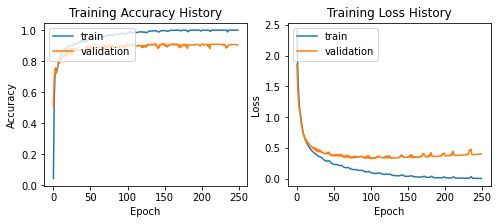

In [9]:

# In[6]: plot
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
def show_train_history_NVAL(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()
    
if VAL !=0: show_train_history(NN_train_history) 
else: show_train_history_NVAL(NN_train_history) 


In [10]:

# In[6]: info
print(NN.summary()) 
NN_weights = np.array(NN.get_weights(),dtype=object)
print('weights shape :',NN_weights.shape)
for i in range (0,NN_weights.shape[0],2):
    print('weights 0 shape :',NN_weights[i].shape)
    print('bias 0 shape :',NN_weights[i+1].shape)  
# In[6]: info
print ('\n\n')
print ('#######################################################')
print ('          Convolutional neural network (CNN)           ')
print ('#######################################################')
print ('\n\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
weights shape : (4,)
weights 0 shape : (784, 256)
bias 0 shape : (256,)
weights 0 shape : (256, 10)
bias 0 shape : (10,)



#######################################################
          Convolutional neural network (CNN)           
###########################

In [11]:
##CNN
def model_CNN(input_shape):
     X_input = Input(input_shape)

 #--------------------------------W1-------------------------------------------- 
     W1 = Conv2D(8, (5, 5), strides = (1, 1), activation = 'relu', name = 'conv1',padding='same')(X_input)
     W1 = AveragePooling2D((2, 2), name='max_pool1_W1')(W1)
     W1 = Conv2D(16, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv2')(W1)

 #--------------------------------W3--------------------------------------------         
     W1 = Flatten()(W1)  
     W1 = Dropout(0.25)(W1)   
 #--------------------------------D1--------------------------------------------
     D1 = Dense(128, activation='relu', name='fc2')(W1)
 #--------------------------------O1--------------------------------------------    
     O1 = Dense(10, activation='softmax', name='out')(D1)    
     
     model_CNN = Model(inputs = X_input, outputs = O1 ,name='NN')
     return model_CNN

In [12]:
# In[4]:  training setup
from keras.callbacks import ModelCheckpoint
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
if VAL !=0:
    checkpoint = ModelCheckpoint("model/Best_CNN_weights_{epoch:02d}_{val_loss:.2f}.h5", 
                                 monitor='val_loss', verbose=0,save_best_only=True, mode='auto', period=1)

CNN=model_CNN((pixel,pixel,1))
print(CNN.summary()) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 8)         208       
_________________________________________________________________
max_pool1_W1 (AveragePooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 16)        1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2304)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               295040    
__________

In [13]:
# In[4]:  training
CNN.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
if VAL !=0:
    CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
else:
    CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1)
'''    
CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
'''
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
# In[6]: info
print(CNN.summary()) 
CNN_weights = np.array(CNN.get_weights(),dtype=object)
print('weights shape :',CNN_weights.shape)
for i in range (0,CNN_weights.shape[0],2):
    print('weights 0 shape :',CNN_weights[i].shape)
    print('bias 0 shape :',CNN_weights[i+1].shape)  


Train on 2200 samples, validate on 550 samples
Epoch 1/250
2200/2200 [==============================] - 1s 351us/step - loss: 2.3073 - acc: 0.1059 - val_loss: 2.1330 - val_acc: 0.4709
Epoch 2/250
2200/2200 [==============================] - 0s 225us/step - loss: 2.1301 - acc: 0.4441 - val_loss: 1.8771 - val_acc: 0.5327
Epoch 3/250
2200/2200 [==============================] - 1s 257us/step - loss: 1.8757 - acc: 0.4895 - val_loss: 1.6343 - val_acc: 0.6400
Epoch 4/250
2200/2200 [==============================] - 1s 237us/step - loss: 1.6153 - acc: 0.6591 - val_loss: 1.7408 - val_acc: 0.3909
Epoch 5/250
2200/2200 [==============================] - 1s 248us/step - loss: 1.7571 - acc: 0.3786 - val_loss: 1.6409 - val_acc: 0.5691
Epoch 6/250
2200/2200 [==============================] - 1s 241us/step - loss: 1.5858 - acc: 0.5950 - val_loss: 1.2444 - val_acc: 0.7782
Epoch 7/250
2200/2200 [==============================] - 1s 243us/step - loss: 1.2257 - acc: 0.7855 - val_loss: 1.0715 - val_acc: 0

2200/2200 [==============================] - 1s 247us/step - loss: 0.2824 - acc: 0.9141 - val_loss: 0.3375 - val_acc: 0.8982
Epoch 61/250
2200/2200 [==============================] - 1s 245us/step - loss: 0.2936 - acc: 0.9100 - val_loss: 0.4385 - val_acc: 0.8800
Epoch 62/250
2200/2200 [==============================] - 1s 250us/step - loss: 0.3291 - acc: 0.8977 - val_loss: 0.3164 - val_acc: 0.9127
Epoch 63/250
2200/2200 [==============================] - 1s 262us/step - loss: 0.2900 - acc: 0.9100 - val_loss: 0.3804 - val_acc: 0.8818
Epoch 64/250
2200/2200 [==============================] - 1s 250us/step - loss: 0.2800 - acc: 0.9186 - val_loss: 0.2934 - val_acc: 0.9182
Epoch 65/250
2200/2200 [==============================] - 1s 253us/step - loss: 0.2572 - acc: 0.9214 - val_loss: 0.3325 - val_acc: 0.9036
Epoch 66/250
2200/2200 [==============================] - 1s 252us/step - loss: 0.2498 - acc: 0.9291 - val_loss: 0.3081 - val_acc: 0.9109
Epoch 67/250
2200/2200 [=======================

Epoch 120/250
2200/2200 [==============================] - 1s 259us/step - loss: 0.1585 - acc: 0.9495 - val_loss: 0.2756 - val_acc: 0.9145
Epoch 121/250
2200/2200 [==============================] - 1s 259us/step - loss: 0.1406 - acc: 0.9514 - val_loss: 0.2654 - val_acc: 0.9218
Epoch 122/250
2200/2200 [==============================] - 1s 257us/step - loss: 0.1191 - acc: 0.9641 - val_loss: 0.2428 - val_acc: 0.9273
Epoch 123/250
2200/2200 [==============================] - 1s 231us/step - loss: 0.0992 - acc: 0.9727 - val_loss: 0.2221 - val_acc: 0.9382
Epoch 124/250
2200/2200 [==============================] - 1s 236us/step - loss: 0.0838 - acc: 0.9809 - val_loss: 0.2308 - val_acc: 0.9327
Epoch 125/250
2200/2200 [==============================] - 1s 253us/step - loss: 0.0807 - acc: 0.9791 - val_loss: 0.2218 - val_acc: 0.9400
Epoch 126/250
2200/2200 [==============================] - 1s 270us/step - loss: 0.0792 - acc: 0.9782 - val_loss: 0.2373 - val_acc: 0.9364
Epoch 127/250
2200/2200 [==

Epoch 179/250
2200/2200 [==============================] - 1s 253us/step - loss: 0.0503 - acc: 0.9859 - val_loss: 0.3018 - val_acc: 0.9182
Epoch 180/250
2200/2200 [==============================] - 1s 261us/step - loss: 0.0624 - acc: 0.9773 - val_loss: 0.2518 - val_acc: 0.9309
Epoch 181/250
2200/2200 [==============================] - 1s 260us/step - loss: 0.0675 - acc: 0.9823 - val_loss: 0.3518 - val_acc: 0.9109
Epoch 182/250
2200/2200 [==============================] - 1s 239us/step - loss: 0.0861 - acc: 0.9741 - val_loss: 0.2451 - val_acc: 0.9364
Epoch 183/250
2200/2200 [==============================] - 1s 244us/step - loss: 0.0665 - acc: 0.9809 - val_loss: 0.3026 - val_acc: 0.9236
Epoch 184/250
2200/2200 [==============================] - 1s 237us/step - loss: 0.0542 - acc: 0.9818 - val_loss: 0.2116 - val_acc: 0.9418
Epoch 185/250
2200/2200 [==============================] - 1s 241us/step - loss: 0.0301 - acc: 0.9927 - val_loss: 0.2187 - val_acc: 0.9400
Epoch 186/250
2200/2200 [==

Epoch 238/250
2200/2200 [==============================] - 1s 250us/step - loss: 0.0096 - acc: 0.9995 - val_loss: 0.2356 - val_acc: 0.9382
Epoch 239/250
2200/2200 [==============================] - 1s 262us/step - loss: 0.0090 - acc: 0.9995 - val_loss: 0.2495 - val_acc: 0.9364
Epoch 240/250
2200/2200 [==============================] - 1s 258us/step - loss: 0.0102 - acc: 0.9982 - val_loss: 0.2419 - val_acc: 0.9400
Epoch 241/250
2200/2200 [==============================] - 1s 251us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.2514 - val_acc: 0.9400
Epoch 242/250
2200/2200 [==============================] - 1s 262us/step - loss: 0.0091 - acc: 0.9986 - val_loss: 0.2424 - val_acc: 0.9418
Epoch 243/250
2200/2200 [==============================] - 1s 265us/step - loss: 0.0103 - acc: 0.9982 - val_loss: 0.2987 - val_acc: 0.9291
Epoch 244/250
2200/2200 [==============================] - 1s 257us/step - loss: 0.0174 - acc: 0.9945 - val_loss: 0.2973 - val_acc: 0.9236
Epoch 245/250
2200/2200 [==

In [14]:
# In[5]:  save_weights
CNN.save('CNN_'+str(complete_time)+'.h5')


Test loss :   0.19516  Test accuracy :  0.94970


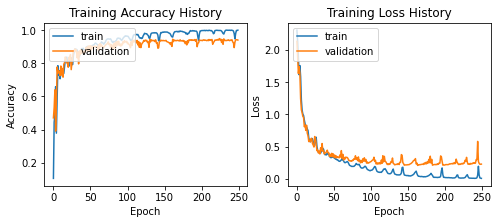

In [15]:

# In[6]:  score
CNN_scores=CNN.evaluate(test_data, {"out":test_label}, verbose=0)  
print('Test loss : ',' {:.5f}'.format(CNN_scores[0]),' Test accuracy :',' {:.5f}'.format(CNN_scores[1]))

if VAL !=0: show_train_history(CNN_train_history) 
else: show_train_history_NVAL(CNN_train_history) 






#######################################################
                       SUMMARY                         
#######################################################



/-------------------------------------------------------
NN.summary():
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None



/--------------

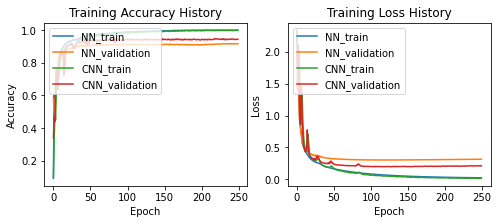

In [43]:

    
# In[6]: Comparison   
print ('\n\n')
print ('#######################################################')
print ('                       SUMMARY                         ')
print ('#######################################################')
print ('\n\n')

print ('/-------------------------------------------------------')
print ('NN.summary():')
print (NN.summary()) 
print ('\n\n')
print ('/-------------------------------------------------------')
print ('CNN.summary():')
print (CNN.summary()) 
print ('\n\n')
print ('/-------------------------------------------------------')
print('NN Test loss : ',' {:.5f}'.format(NN_scores[0]),' NN Test accuracy :',' {:.5f}'.format(NN_scores[1]))
print('CNN Test loss : ',' {:.5f}'.format(CNN_scores[0]),' CNN Test accuracy :',' {:.5f}'.format(CNN_scores[1]))
print ('\n\n')
print ('/-------------------------------------------------------')
def Comparison_train_history(NN,CNN):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(NN.history["acc"])
    plt.plot(NN.history["val_acc"])
    plt.plot(CNN.history["acc"])
    plt.plot(CNN.history["val_acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["NN_train", "NN_validation","CNN_train", "CNN_validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(NN.history["loss"])
    plt.plot(NN.history["val_loss"])
    plt.plot(CNN.history["loss"])
    plt.plot(CNN.history["val_loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["NN_train", "NN_validation","CNN_train", "CNN_validation"], loc="upper left")
    plt.show()
def Comparison_train_history_NVAL(NN,CNN):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(NN.history["acc"])
    plt.plot(CNN.history["acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["NN_train","CNN_train"], loc="upper left")
    plt.subplot(122)
    plt.plot(NN.history["loss"])
    plt.plot(CNN.history["loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["NN_train","CNN_train"], loc="upper left")
    plt.show()

if VAL !=0: Comparison_train_history(NN_train_history,CNN_train_history)
else: Comparison_train_history_NVAL(NN_train_history,CNN_train_history)